# Data Processing 

L'objectif est de prédire les futures ventes des produits dans toutes les boutiques 

In [66]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
## Chargement des données 
df_salesTrain = pd.read_csv('data/sales_train.csv')

In [8]:
df_salesTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


**Explication des colonnes**

- date_block_num - Rang du mois du JAN 13 à OCT 15
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_price - current price of an item
- item_cnt_day - number of products sold. (You are predicting a monthly amount of this measure)

In [9]:
df_salesTrain.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [10]:
df_salesTrain.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [37]:
# nombre de produit unique 
print('Le nombre de produit unique est de : {} et le nombre de magasin unique est de {}.'.
      format(len(pd.unique(df_salesTrain.item_id)),
             len(pd.unique(df_salesTrain.shop_id))))


Le nombre de produit unique est de : 21807 et le nombre de magasin unique est de 60.


**Negative price**

In [78]:
df_salesTrain[df_salesTrain.item_price.lt(0)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


**Remarque**

L'objectif étant de prédire la quantité de produit vendu (item_cnt_day) par mois, Nous voyons que cette messure peut être négative. Donc les retours des produits sont aussi renseignés. 

**Combien de lignes de retours de produits ?**

In [91]:
# Combien de lignes de retours de produits ?
salesAmountNeg = df_salesTrain[df_salesTrain.item_cnt_day.lt(0)]
print(round(100 * salesAmountNeg.shape[0] / df_salesTrain.shape[0], 2), "%")

0.25 %


**Le pourcentage de produit concernée**

In [50]:
print('Soit {}% des produits.'.
      format(round(len(pd.unique(salesAmountNeg.item_id)) * 100 / 
                   len(pd.unique(df_salesTrain.item_id)),2)))

Soit 16.1% des produits.


### Distribution de variables 

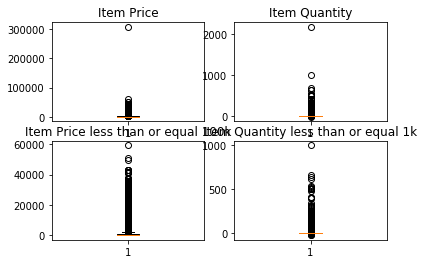

In [97]:
fig, axs = plt.subplots(2, 2)

axs[0,0].boxplot(df_salesTrain.item_price)
axs[0,0].set_title('Item Price')

axs[0,1].boxplot(df_salesTrain.item_cnt_day)
axs[0,1].set_title('Item Quantity')

axs[1,0].boxplot(df_salesTrain.item_price[df_salesTrain.item_price.le(100000)])
axs[1,0].set_title('Item Price less than or equal 100k')

axs[1,1].boxplot(df_salesTrain.item_cnt_day[df_salesTrain.item_cnt_day.le(1000)])
axs[1,1].set_title('Item Quantity less than or equal 1k')


plt.show()

Decide de garder seulement les lignes où le prix de ventes est inférieur à 100k et le nombre d'item vendu est inférieur ou égale à 1000. A noter que l'unique observation avec le prix de vente négative est juste supprimer.

In [112]:
df_salesTrain = df_salesTrain[df_salesTrain.item_price.le(100000) &  
                              df_salesTrain.item_price.gt(0) &
                              df_salesTrain.item_cnt_day.le(1000)]

# Compute monthly amount 

In [132]:
df_salesTrainMonth =  df_salesTrain.groupby(['date_block_num', 'shop_id', 'item_id']).sum()

In [134]:
df_salesTrainMonth.columns = ['item_price', 'item_cnt_month']

In [135]:
df_salesTrainMonth.reset_index(inplace=True)

In [136]:
df_salesTrainMonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609123 entries, 0 to 1609122
Data columns (total 5 columns):
date_block_num    1609123 non-null int64
shop_id           1609123 non-null int64
item_id           1609123 non-null int64
item_price        1609123 non-null float64
item_cnt_month    1609123 non-null float64
dtypes: float64(2), int64(3)
memory usage: 61.4 MB


In [137]:
df_salesTrainMonth.head(10)

,date_block_num,shop_id,item_id,item_price,item_cnt_month
0,0,0,32,884.0,6.0
1,0,0,33,1041.0,3.0
2,0,0,35,247.0,1.0
3,0,0,43,221.0,1.0
4,0,0,51,257.0,2.0
5,0,0,61,195.0,1.0
6,0,0,75,76.0,1.0
7,0,0,88,76.0,1.0
8,0,0,95,193.0,1.0
9,0,0,96,70.0,1.0


In [138]:
df_salesTrainMonth.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_month
count,1.609123e+06,1.609123e+06,1.609123e+06,1.609123e+06,1.609123e+06
mean,1.466480e+01,3.280586e+01,1.068099e+04,1.625173e+03,2.265852e+00
std,9.542325e+00,1.653701e+01,6.238884e+03,5.696496e+03,8.466196e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e-02,-2.200000e+01
25%,6.000000e+00,2.100000e+01,5.045000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,1.049700e+04,4.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.606000e+04,1.398000e+03,2.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,6.719300e+05,1.644000e+03


Est-il possible que sur un mois il y'a eu que des élements d'un produit retourner ?

**Combien de lignes de retours de produits sur tt le mois ?**

In [139]:
salesAmountMonthNeg = df_salesTrainMonth[df_salesTrainMonth.item_cnt_month.lt(0)]
print('Soit {}% des quantités mensuelle.'.
      format(round(100 * salesAmountMonthNeg.shape[0] / 
                   df_salesTrainMonth.shape[0], 2)))

Soit 0.06% des quantités mensuelle.


In [140]:
salesAmountMonthNeg.sort_values(by=['item_cnt_month'])

,date_block_num,shop_id,item_id,item_price,item_cnt_month
575843,10,12,8023,15.0,-22.0
11045,0,12,1590,10396.0,-13.0
11047,0,12,1593,5397.0,-6.0
1026258,19,12,11367,875.0,-5.0
575694,10,12,3732,15204.0,-4.0
...,...,...,...,...,...
525565,9,12,18214,249.0,-1.0
532061,9,21,9784,809.0,-1.0
537988,9,26,7815,5590.0,-1.0
525080,9,12,1830,599.0,-1.0


**L'exemple de l'item 8023**

In [141]:
df_salesTrain[df_salesTrain.item_id.eq(8023) & df_salesTrain.shop_id.eq(12) ]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
511574,31.05.2013,4,12,8023,20.0,1.0
885224,25.09.2013,8,12,8023,15.0,22.0
1057907,02.11.2013,10,12,8023,15.0,-22.0
1175066,27.12.2013,11,12,8023,15.0,1.0
1330814,27.01.2014,12,12,8023,15.0,20.0


**Le pourcentage de produit concernée**

In [142]:
print('est {}% des produits.'.
      format(round(len(pd.unique(salesAmountMonthNeg.item_id)) * 100 / 
                   len(pd.unique(df_salesTrainMonth.item_id)),2)))

est 3.48% des produits.
